# Dimensionality Reduction Tests

In [1]:
from utils.dr_experiments import get_datasets_dr, batch_dr, evaluate_dr_methods
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set(font_scale=1.2, style="whitegrid")


## Load datasets and reduce the numbers of dimentions

In [2]:
print("getting datasets")
dr_datasets = get_datasets_dr()
qt_list = [30, 1 / (255/150), 0.01]
repeat = 5
print("reducing")
reduced = batch_dr(dr_datasets, qt_list, repeat=repeat)

getting datasets
reducing


## 1-NN, trustworthiness and continuity tests

In [3]:
#ks = [5, 10, 20, 30, 50, 100, 200]
ks = [5e-4, 1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2, 1e-1, 2e-1]

In [4]:
df_error, df_m1, df_m2 = evaluate_dr_methods(dr_datasets, reduced, ks, repeat=repeat)

In [5]:
df_error_cos, df_m1_cos, df_m2_cos = evaluate_dr_methods(dr_datasets, reduced, ks, "cosine", repeat=repeat)

## Results

### In Euclidean Distance

In [18]:
df_error

mean                                 std            \
dataset 20newgroups    mnist olivetti_faces 20newgroups     mnist   
method                                                              
DBOWE       0.15800  0.04458         0.0595    0.001487  0.001085   
None        0.33520  0.05640         0.0575    0.000000  0.000000   
PCA         0.61006  0.04978         0.0570    0.001365  0.000164   

                        
dataset olivetti_faces  
method                  
DBOWE         0.002092  
None          0.000000  
PCA           0.001118

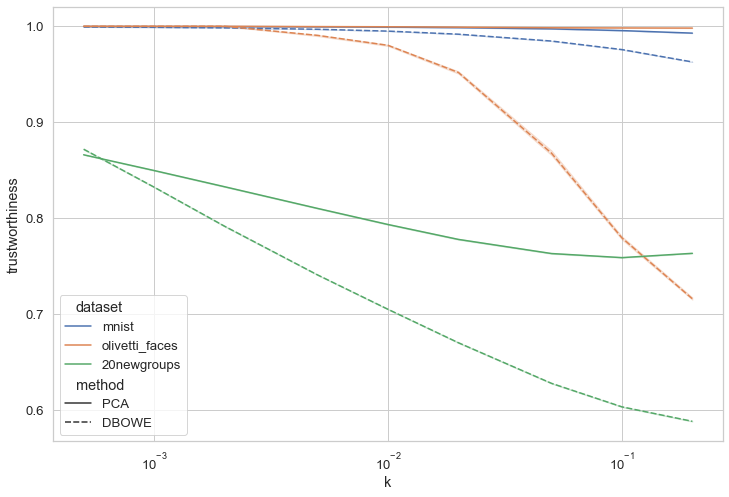

In [19]:
if not os.path.isdir("figures"): os.mkdir("figures")
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x="k", y="trustworthiness", hue="dataset", style="method", data=df_m1,
            ax=ax);
ax.set_xscale('log')
f.savefig("figures/m1.jpg")

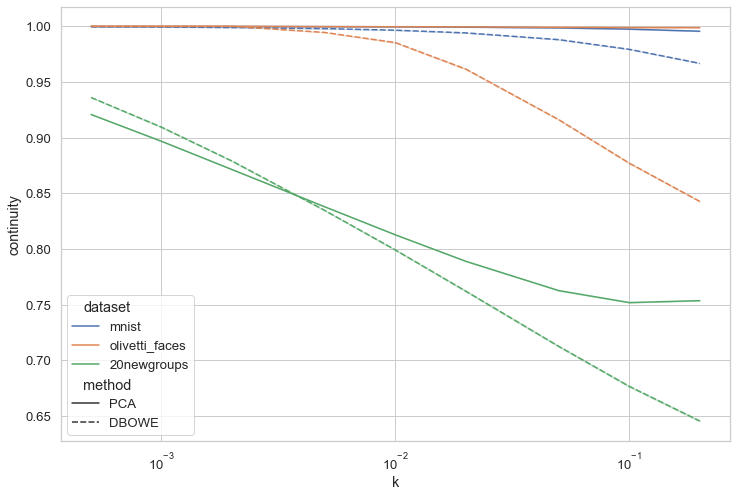

In [20]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x="k", y="continuity", hue="dataset", style="method", data=df_m2,
            ax=ax);
ax.set_xscale('log')
f.savefig("figures/m2.jpg")

### In Cosine Similarity

In [21]:
df_error_cos

mean                                 std            \
dataset 20newgroups    mnist olivetti_faces 20newgroups     mnist   
method                                                              
DBOWE       0.14622  0.04128         0.0575    0.002479  0.001139   
None        0.33520  0.05010         0.0725    0.000000  0.000000   
PCA         0.60924  0.04846         0.0620    0.000780  0.000230   

                        
dataset olivetti_faces  
method                  
DBOWE         0.001768  
None          0.000000  
PCA           0.001118

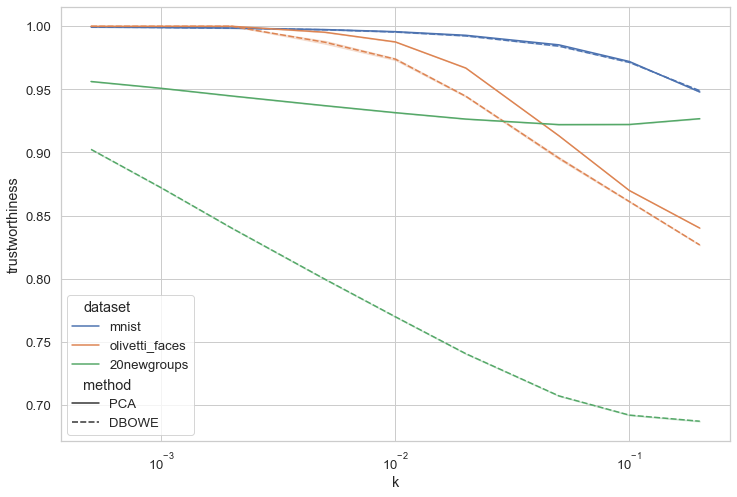

In [22]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x="k", y="trustworthiness", hue="dataset", style="method", data=df_m1_cos,
            ax=ax)
ax.set_xscale('log')
f.savefig("figures/m1_cos.jpg")

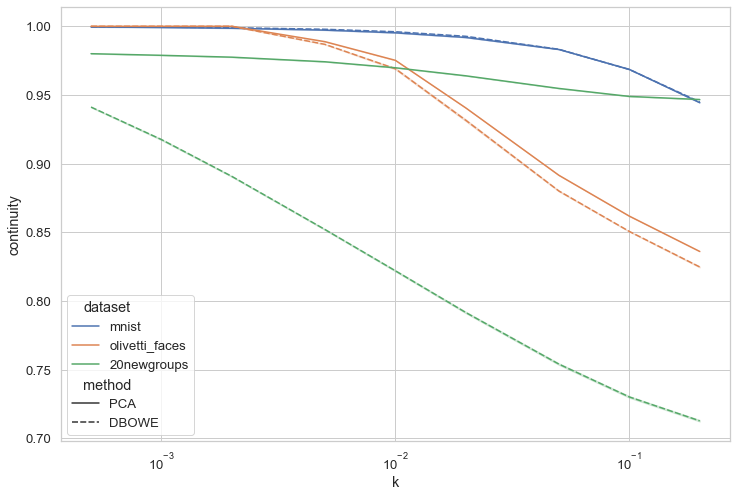

In [23]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x="k", y="continuity", hue="dataset", style="method", data=df_m2_cos,
            ax=ax);
ax.set_xscale('log')
f.savefig("figures/m2_cos.jpg")